<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_2_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto 2: Muestreo de Varibales Aleatorias**

##0. Cargamos Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew #Coeficiente de Asimetría
from scipy.stats import kurtosis #Kurtosis
import random as rnd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Cargamos la Base de Datos (Archivo de Trabajo)

**Descripción de las Variables**
Esta base de datos de eventos de pérdida, posee dos variables:


1.   *Frecuencia:* Indica el número de eventos de pérdida por período de tiempo (semana, día, mes)
2.   *Severidad:* Indica el costo de cada evento de pérdida

In [ ]:
nxl = "/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/6.3 AdmonEjecProcesos.xlsx"
XDB = pd.read_excel(nxl, sheet_name=1)
XDB.head(100)

,Fechas,Frecuencia,Severidad
0,2010-01-01,5,0.079029
1,2010-01-02,7,0.021259
2,2010-01-03,9,0.038818
3,2010-01-04,3,0.035956
4,2010-01-05,4,0.204951
...,...,...,...
95,2010-04-06,10,0.206232
96,2010-04-07,7,0.019812
97,2010-04-08,6,0.054705
98,2010-04-09,6,0.006537


##2. Datos Base

In [ ]:
Xf = XDB.iloc[:,1] #Frecuencia
Xs = XDB.iloc[:,2] #Severidad
LDA = Xf * Xs #Distribución Agregada

In [ ]:
u = np.mean(LDA) #Limite superior pérdidas esperadas (Zona 1)
OpVar= np.percentile(LDA, 0.999) #Valor Asegurado OpVar (Zona 3)
PNE = (u+OpVar)/2 #Pérdidas Esperadas (Zona 2)

#Parámetros de Riesgo
print("Las pérdidas esperadas son:\n", u)
print("Las pérdidas no esparadas son:\n", PNE)
print("El valor de la poliza de aseguramiento:\n", OpVar)

Las pérdidas esperadas son:
 1.469187040102234
Las pérdidas no esparadas son:
 0.734593520051117
El valor de la poliza de aseguramiento:
 0.0


In [ ]:
#Error asociado con la muestra de los datos
z= 2**2
p= 0.9550
nd= len(LDA)
ek2= (z*p*(1-p))/nd
ek= np.sqrt(ek2)
print(f"Error asociado con la muestra de los datos: {ek}")

Error asociado con la muestra de los datos: 0.022161743098024975


In [ ]:
#Distorsiones de la Media
#LI - Media
uek_resta = u-ek
print("LI - Media:",uek_resta )
#LS + Media
uek_suma = u+ek
print("LS + Media", uek_suma)

LI - Media: 1.447025297004209
LS + Media 1.491348783200259


In [ ]:
#Calculamos el coeficiente de asimetría
cas=skew(LDA)
print("El coeficiente de asimetría de los datos es: ", cas)

#Calculamos el coeficiente de curtosis
kur=kurtosis(LDA)
print("La kurtosis de los datos es: ", kur)

El coeficiente de asimetría de los datos es:  5.059212525816747
La kurtosis de los datos es:  29.643693069779438


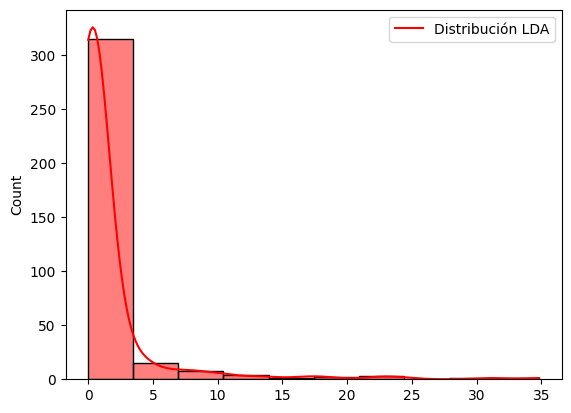

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDA,bins=10,kde=True, color='red')
plt.legend(['Distribución LDA'])
plt.show()

In [ ]:
#Tipo de Distribución
#Hacemos la función
def identificar_distribucion(cas, kur):
  """
  Identifica la posible distribución estadística basándose en los valores de asimetría (cas) y curtosis (kur).

  Argsumentos:
    cas: Coeficiente de asimetría.
    kur: Coeficiente de curtosis.

  Returns:
    Una cadena con el nombre de la distribución identificada si se puede determinar.
  """
  if abs(cas) < 0.5 and abs(kur) < 0.5:
    return "Posible distribución Normal"
  elif cas > 0 and kur > 3:
    if kur >= 8:
      return "Posible distribución Exponencial"
    elif kur >= 6:
      return "Posible distribución Gamma"
    else:
      return "Posible distribución Weibull"
  elif cas < 0 and kur < 3:
    return "Posible distribución Beta"
  elif kur < 3:
    return "Posible distribución Uniforme"
  else:
    return "No se puede determinar la distribución"

#Encontramos el tipo de distribución
distr= identificar_distribucion(cas, kur)
print(distr)

Posible distribución Exponencial


##3. Muestreo de la Variable

In [ ]:
counts, bin_edges= np.histogram(LDA, bins=10)

LI = bin_edges[:-1] #Limites Inferiores
LS = bin_edges[1:]  #Limites Superiores
mc= (LI+LS)/2 #Marca de Clase (Medias de Clase)

pdf= counts/sum(counts) #Nos entrega la frecuencia relativa (% de datos por intervalo)

cdf= np.cumsum(pdf) #Construimos la ruleta (el acumulado de las probabilidades)

In [ ]:
#Hacemos la Tabla
df= pd.DataFrame(np.column_stack((LI,LS,mc,pdf,cdf)))
df.columns= ['LI','LS','mc','pdf','cdf']
df.head(10)

,LI,LS,mc,pdf,cdf
0,0.000000,3.482216,1.741108,0.900000,0.900000
1,3.482216,6.964431,5.223323,0.042857,0.942857
2,6.964431,10.446647,8.705539,0.022857,0.965714
3,10.446647,13.928862,12.187755,0.011429,0.977143
4,13.928862,17.411078,15.669970,0.002857,0.980000
5,17.411078,20.893294,19.152186,0.005714,0.985714
6,20.893294,24.375509,22.634402,0.008571,0.994286
7,24.375509,27.857725,26.116617,0.000000,0.994286
8,27.857725,31.339941,29.598833,0.002857,0.997143
9,31.339941,34.822156,33.081048,0.002857,1.000000


###3.1. Se procede con el muestreo de la variable a una confiabilidad del 99%

In [ ]:
#Tamaño del Intervalo
TI= LS[0]-LI[0]

#Confiabilidad del 99% - 100 datos
LDAm=np.zeros((100,1))

for i in range(100):
  print("Interación:",i)
  aleatorio = rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de  números es:\n",cdf)
  print(aleatorio<cdf)
  intervalo = np.array(np.where(aleatorio<cdf))
  print("El intervalo de trabajo es:\n",intervalo[0,0])
  print("Los limites inferiores son:\n", LI)
  aleatorio2= rnd.random()
  print("El intervalo seleccionado es:\n", LI[intervalo[0,0]])
  LDAm[i]=LI[intervalo[0,0]]+TI*aleatorio2
  print("El valor muestreado es:", LDAm[i])

Interación: 0
El aleatorio es: 0.1873550411573126
La lista de  números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 0
Los limites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [0.60880797]
Interación: 1
El aleatorio es: 0.4026279654503194
La lista de  números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 0
Los limites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [3.

In [ ]:
u_m = np.mean(LDAm) #Limite superior pérdidas esperadas (Zona 1)
OpVar_m= np.percentile(LDAm, 0.999) #Valor Asegurado OpVar (Zona 3)
PNE_m = (u_m+OpVar_m)/2 #Pérdidas Esperadas (Zona 2)

#Parámetros de Riesgo
print("Las pérdidas esperadas son:\n", u_m)
print("Las pérdidas no esparadas son:\n", PNE_m)
print("El valor de la poliza de aseguramiento:\n", OpVar_m)

#Error asociado con la muestra de los datos
z_m= 2**2
p_m= 0.9550
nd_m= len(LDAm)
ek2_m= (z_m*p_m*(1-p_m))/nd_m
ek_m= np.sqrt(ek2_m)
print(f"Error asociado con la muestra de los datos: {ek_m}")

#Distorsiones de la Media
#LI - Media
uek_resta_m = u_m-ek_m
print("LI - Media:",uek_resta_m )
#LS + Media
uek_suma_m = u_m+ek_m
print("LS + Media", uek_suma_m)

#Calculamos el coeficiente de asimetría
cas_m=skew(LDAm)
print("El coeficiente de asimetría de los datos es: ", cas_m)

#Calculamos el coeficiente de curtosis
kur_m=kurtosis(LDAm)
print("La kurtosis de los datos es: ", kur_m)

#Encontramos el tipo de distribución
distr_m= identificar_distribucion(cas_m, kur_m)
print(distr_m)

Las pérdidas esperadas son:
 2.3333108038881645
Las pérdidas no esparadas son:
 1.2291232655181452
El valor de la poliza de aseguramiento:
 0.12493572714812595
Error asociado con la muestra de los datos: 0.041460824883255774
LI - Media: 2.2918499790049087
LS + Media 2.3747716287714202
El coeficiente de asimetría de los datos es:  [4.83108972]
La kurtosis de los datos es:  [24.89528994]
Posible distribución Exponencial


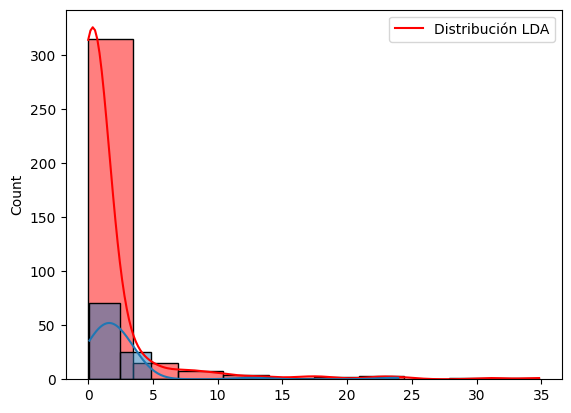

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDA,bins=10,kde=True, color='red')
sns.histplot(LDAm,bins=10,kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

###3.2. Se procede con el muestreo de la variable a una confiabilidad del 99,9%

In [ ]:
#Tamaño del Intervalo
TI= LS[0]-LI[0]

#Confiabilidad del 99,9% - 1000 datos
LDAm1=np.zeros((1000,1))

for i in range(1000):
  print("Interación:",i)
  aleatorio = rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de  números es:\n",cdf)
  print(aleatorio<cdf)
  intervalo = np.array(np.where(aleatorio<cdf))
  print("El intervalo de trabajo es:\n",intervalo[0,0])
  print("Los limites inferiores son:\n", LI)
  aleatorio2= rnd.random()
  print("El intervalo seleccionado es:\n", LI[intervalo[0,0]])
  LDAm1[i]=LI[intervalo[0,0]]+TI*aleatorio2
  print("El valor muestreado es:", LDAm1[i])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 0.0
El valor muestreado es: [1.93876662]
Interación: 643
El aleatorio es: 0.8521782280798437
La lista de  números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 0
Los limites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [2.19387993]
Interación: 644
El aleatorio es: 0.8324173009539023
La lista de  números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 0
Los limites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781

In [ ]:
u_m1 = np.mean(LDAm1) #Limite superior pérdidas esperadas (Zona 1)
OpVar_m1= np.percentile(LDAm1, 0.999) #Valor Asegurado OpVar (Zona 3)
PNE_m1 = (u_m1+OpVar_m1)/2 #Pérdidas Esperadas (Zona 2)

#Parámetros de Riesgo
print("Las pérdidas esperadas son:\n", u_m1)
print("Las pérdidas no esparadas son:\n", PNE_m1)
print("El valor de la poliza de aseguramiento:\n", OpVar_m1)

#Error asociado con la muestra de los datos
z_m1= 2**2
p_m1= 0.9550
nd_m1= len(LDAm1)
ek2_m1= (z_m1*p_m1*(1-p_m1))/nd_m1
ek_m1= np.sqrt(ek2_m1)
print(f"Error asociado con la muestra de los datos: {ek_m1}")

#Distorsiones de la Media
#LI - Media
uek_resta_m1 = u_m1-ek_m1
print("LI - Media:",uek_resta_m1 )
#LS + Media
uek_suma_m1 = u_m1+ek_m1
print("LS + Media", uek_suma_m1)

#Calculamos el coeficiente de asimetría
cas_m1=skew(LDAm1)
print("El coeficiente de asimetría de los datos es: ", cas_m1)

#Calculamos el coeficiente de curtosis
kur_m1=kurtosis(LDAm1)
print("La kurtosis de los datos es: ", kur_m1)

#Encontramos el tipo de distribución
distr_m1= identificar_distribucion(cas_m1, kur_m1)
print(distr_m1)

Las pérdidas esperadas son:
 2.6441915139406142
Las pérdidas no esparadas son:
 1.347389644728372
El valor de la poliza de aseguramiento:
 0.050587775516129814
Error asociado con la muestra de los datos: 0.0131110640300473
LI - Media: 2.631080449910567
LS + Media 2.6573025779706616
El coeficiente de asimetría de los datos es:  [4.61457082]
La kurtosis de los datos es:  [25.56842612]
Posible distribución Exponencial


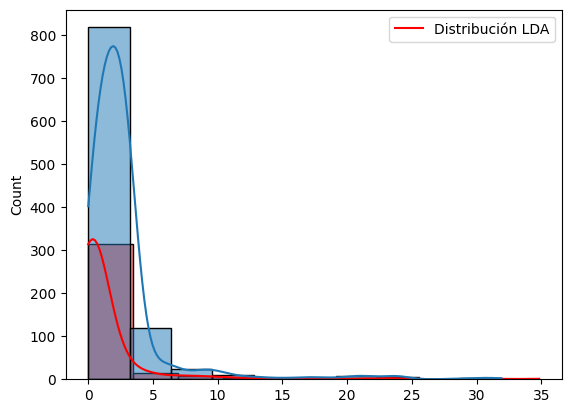

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDA,bins=10,kde=True, color='red')
sns.histplot(LDAm1,bins=10,kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

###3.3. Se procede con el muestreo de la variable a una confiabilidad del 99,99%

In [ ]:
#Tamaño del Intervalo
TI= LS[0]-LI[0]

#Confiabilidad del 99,99% - 10000 datos
LDAm2=np.zeros((10000,1))

for i in range(10000):
  print("Interación:",i)
  aleatorio = rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de  números es:\n",cdf)
  print(aleatorio<cdf)
  intervalo = np.array(np.where(aleatorio<cdf))
  print("El intervalo de trabajo es:\n",intervalo[0,0])
  print("Los limites inferiores son:\n", LI)
  aleatorio2= rnd.random()
  print("El intervalo seleccionado es:\n", LI[intervalo[0,0]])
  LDAm2[i]=LI[intervalo[0,0]]+TI*aleatorio2
  print("El valor muestreado es:", LDAm2[i])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 0.0
El valor muestreado es: [2.81876124]
Interación: 9643
El aleatorio es: 0.37098189555266436
La lista de  números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 0
Los limites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [0.94428572]
Interación: 9644
El aleatorio es: 0.6974305341739994
La lista de  números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 0
Los limites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110

In [ ]:
u_m2 = np.mean(LDAm2) #Limite superior pérdidas esperadas (Zona 1)
OpVar_m2= np.percentile(LDAm2, 0.999) #Valor Asegurado OpVar (Zona 3)
PNE_m2 = (u_m2+OpVar_m2)/2 #Pérdidas Esperadas (Zona 2)

#Parámetros de Riesgo
print("Las pérdidas esperadas son:\n", u_m2)
print("Las pérdidas no esparadas son:\n", PNE_m2)
print("El valor de la poliza de aseguramiento:\n", OpVar_m2)

#Error asociado con la muestra de los datos
z_m2= 2**2
p_m2= 0.9550
nd_m2= len(LDAm2)
ek2_m2= (z_m2*p_m2*(1-p_m2))/nd_m2
ek_m2= np.sqrt(ek2_m2)
print(f"Error asociado con la muestra de los datos: {ek_m2}")

#Distorsiones de la Media
#LI - Media
uek_resta_m2 = u_m2-ek_m2
print("LI - Media:",uek_resta_m2 )
#LS + Media
uek_suma_m2 = u_m2+ek_m2
print("LS + Media", uek_suma_m2)

#Calculamos el coeficiente de asimetría
cas_m2=skew(LDAm2)
print("El coeficiente de asimetría de los datos es: ", cas_m2)

#Calculamos el coeficiente de curtosis
kur_m2=kurtosis(LDAm2)
print("La kurtosis de los datos es: ", kur_m2)

#Encontramos el tipo de distribución
distr_m2= identificar_distribucion(cas_m2, kur_m2)
print(distr_m2)

Las pérdidas esperadas son:
 2.6341097936870863
Las pérdidas no esparadas son:
 1.3367375920174762
El valor de la poliza de aseguramiento:
 0.03936539034786624
Error asociado con la muestra de los datos: 0.004146082488325578
LI - Media: 2.629963711198761
LS + Media 2.638255876175412
El coeficiente de asimetría de los datos es:  [4.84263902]
La kurtosis de los datos es:  [28.28074859]
Posible distribución Exponencial


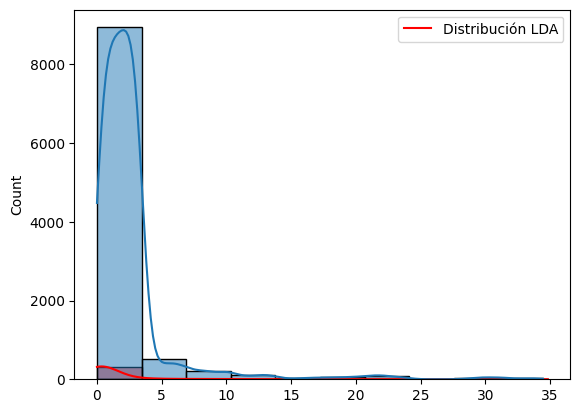

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDA,bins=10,kde=True, color='red')
sns.histplot(LDAm2,bins=10,kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

##4. Resultados

In [ ]:
#Datos de la tabla
data = {
    'Confiabilidad': ['Datos Base', '99%', '99,9%', '99,99%'],
    'ND': [nd, nd_m, nd_m1, nd_m2],
    'Media (u)': [u, u_m, u_m1, u_m2],
    'Error': [ek, ek_m, ek_m1, ek_m2],
    'u+ek': [uek_suma, uek_suma_m , uek_suma_m1 , uek_suma_m2],
    'u-ek': [uek_resta, uek_resta_m, uek_resta_m1, uek_resta_m2],
    'Asimetría': [cas, cas_m, cas_m1, cas_m2],
    'Kurtosis': [kur, kur_m, kur_m1, kur_m2],
    'Tipo Distribución': [distr, distr_m, distr_m1, distr_m2]
}

#Creamos el DataFrame
df = pd.DataFrame(data)

#Mostramos la tabla
df

,Confiabilidad,ND,Media (u),Error,u+ek,u-ek,Asimetría,Kurtosis,Tipo Distribución
0,Datos Base,350,1.469187,0.022162,1.491349,1.447025,5.059213,29.643693,Posible distribución Exponencial
1,99%,100,2.333311,0.041461,2.374772,2.291850,[4.831089715718405],[24.89528993668075],Posible distribución Exponencial
2,"99,9%",1000,2.644192,0.013111,2.657303,2.631080,[4.614570823785959],[25.568426119548036],Posible distribución Exponencial
3,"99,99%",10000,2.634110,0.004146,2.638256,2.629964,[4.842639022295611],[28.280748586397127],Posible distribución Exponencial


##5. Análisis de Resultados

La base de datos utilizada para este estudio posee un total de 350 datos de eventos de riesgo semanales en transacciones fallidas en una entidad fintech. Los datos bases presentaron una media de 1.46, un error de 0.022, así como un coeficiente de asimetría 5.05, y un coeficiente de curtosis 29.64. Luego del muestreo a tres confiabilidades del 99%(100), 99,9% (1000), y 99,99% (10000), los valores de asimetría encontrados para cada confiabilidad fueron: 4.83, 4.61, y 4.84 respectivamente. Estas fueron muy similares entre si, al igual que con el coeficiente de asimetría de los datos base. No obstante, el que más se acerca al valor original (5.09), fue el de una confiabilidad de 99.99% (4.84). Ahora, con respecto al coeficiente de curtosis los valores encontrados fueron 24.89, 25.56 y 28.28 respectivamente. En este caso, el coeficiente de curtosis que más se asemeja al de los datos originales (29.64) también fue el de confiabilidad 99.99% (28.28). Tanto los datos originales como los datos muestreados, responden de acuerdo con su coeficiente de asimetría y a su coeficiente de curtosis a distribuciones exponenciales. Es importante mencionar que al tener coeficientes de asimetría positivos, esto indica pérdidas esperadas mucho más altas, y menores pérdidas catastróficas (OpVar).